In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from imblearn.under_sampling import NearMiss
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns

### Задание 1:

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [3]:
p_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['weather'] == 'дождь'])
print(p_stroll)

0.3333333333333333


### Задание 2:

In [4]:
df = pd.read_csv('../data/card_transdata.csv')
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [5]:
df.info()
df['used_chip'] = df['used_chip'].astype(int)
df['repeat_retailer'] = df['repeat_retailer'].astype(int)
df['used_pin_number'] = df['used_pin_number'].astype(int)
df['online_order'] = df['online_order'].astype(int)
df['fraud'] = df['fraud'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          -------

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


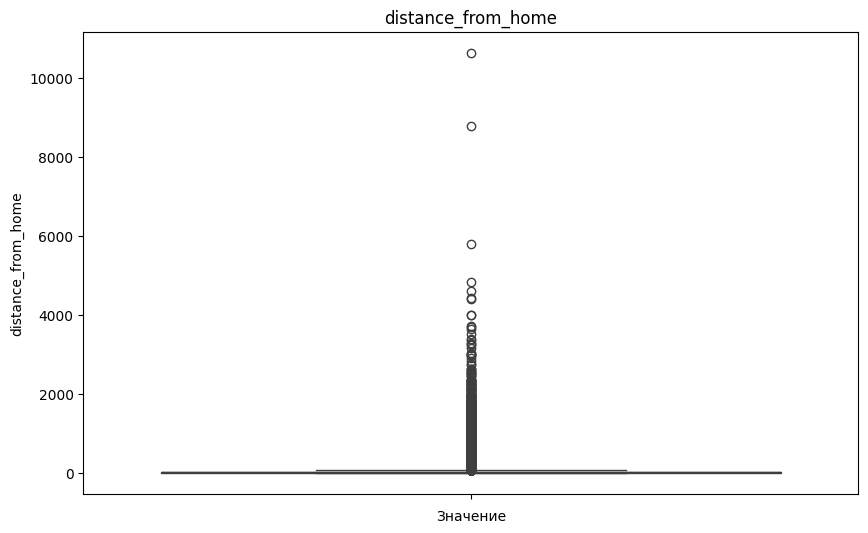

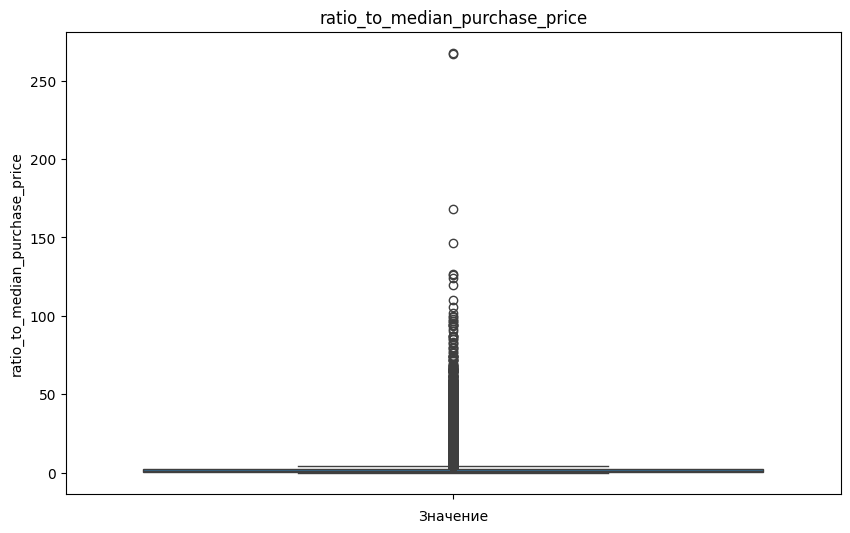

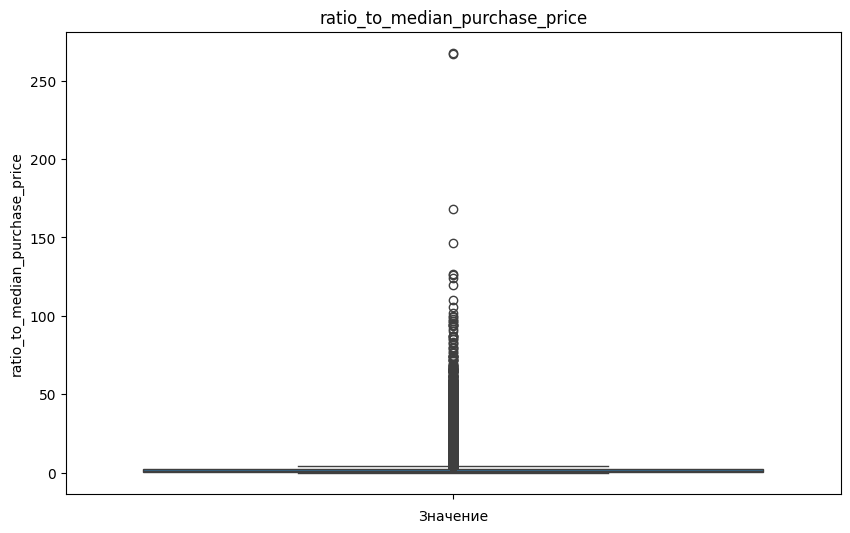

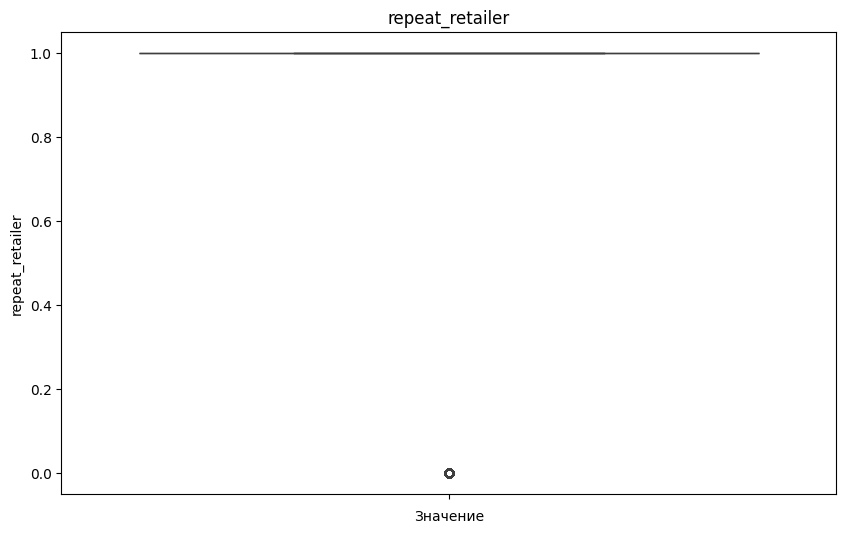

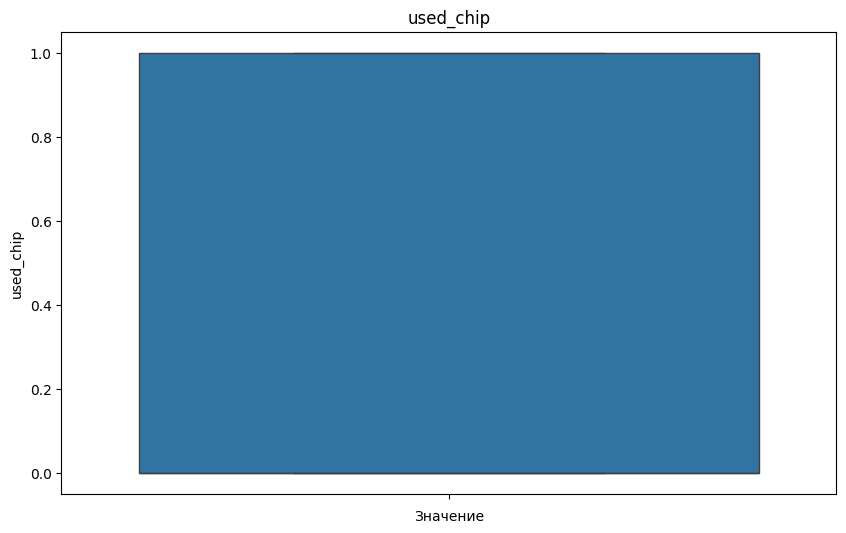

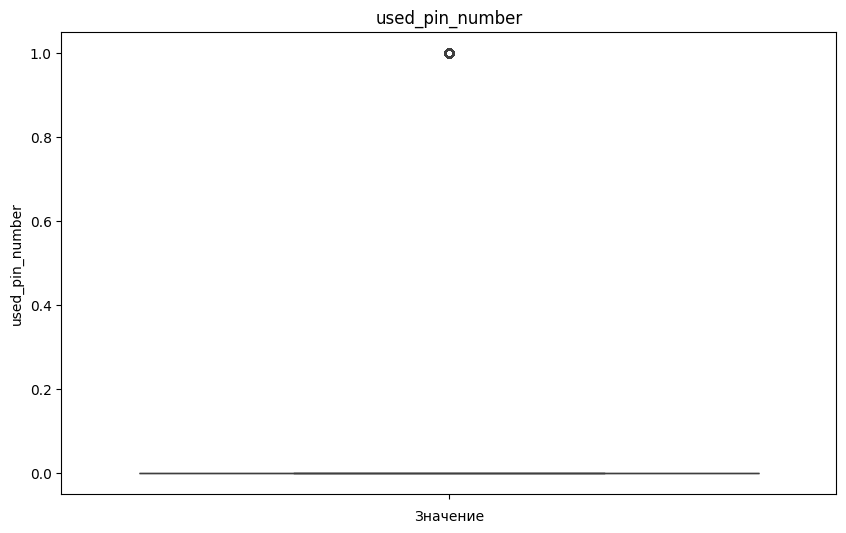

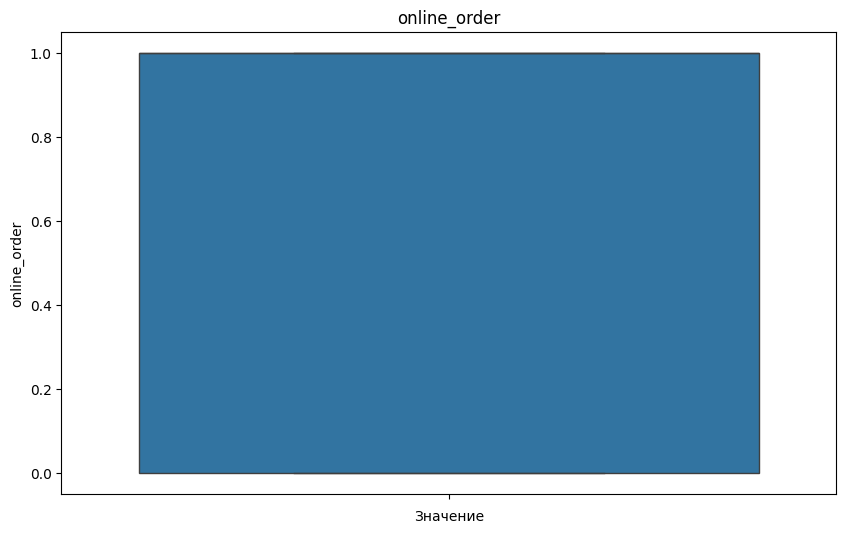

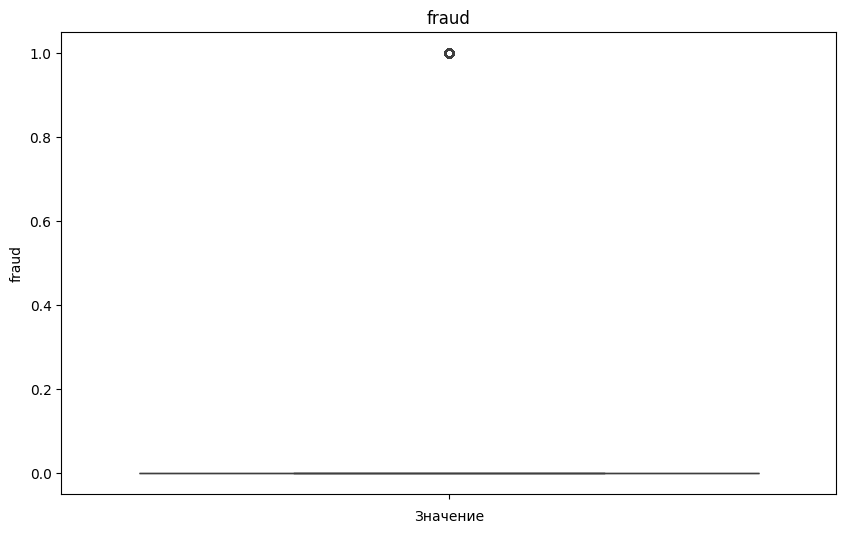

In [12]:

columns = ['distance_from_home', 'ratio_to_median_purchase_price', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'{col}')
    plt.xlabel('Значение')
    plt.show()

In [8]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [37]:
df.head(15)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


In [38]:
X = df.drop(['fraud'], axis=1)
y= df['fraud']
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [39]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud, Length: 1000000, dtype: int32

Text(0, 0.5, 'Количество карт')

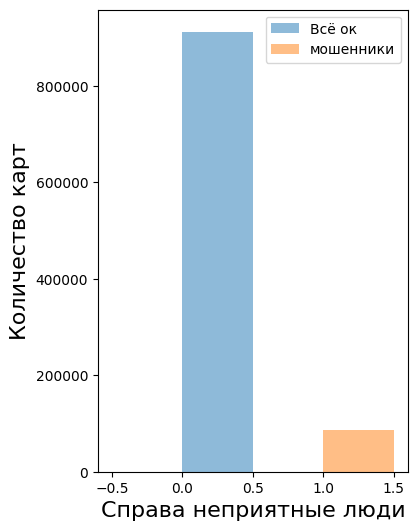

In [10]:
bins = 2

plt.figure(figsize = (4,6))

plt.hist(y.loc[y == 0], bins, alpha = 0.5, label = 'Всё ок')

plt.hist(y.loc[y == 1], bins, alpha = 0.5, label = 'мошенники')
plt.legend()

plt.xlabel('Справа неприятные люди', fontsize = 16)
plt.ylabel('Количество карт', fontsize = 16)

### KNN:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [12]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
966912,51.773726,2.007652,1.288747,1,0,0,1
502002,3.252506,17.361662,3.020245,1,1,0,0
990153,3.021983,0.072441,2.111721,1,0,0,1
577036,1.435094,2.116576,0.357052,0,0,0,1
331413,12.680108,0.071173,22.461183,1,1,0,0
...,...,...,...,...,...,...,...
242675,198.406062,0.383042,0.858487,1,0,0,0
744388,8.934399,1.003890,3.492086,1,1,0,0
730617,7.915508,8.064005,1.324743,1,0,0,1
826846,10.108489,0.031378,2.539250,1,0,0,1


In [13]:
y_test

966912    0
502002    0
990153    0
577036    0
331413    0
         ..
242675    0
744388    0
730617    0
826846    0
1430      0
Name: fraud, Length: 200000, dtype: int32

In [14]:
Input = [('minmaxscaler', MinMaxScaler()), ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)) ]

pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

y_knn_pred = pipe.predict(X_test)

In [15]:
accuracy_score(y_test, y_knn_pred)
confusion_matrix(y_test, y_knn_pred)

array([[182462,     57],
       [   137,  17344]], dtype=int64)

In [16]:
print(classification_report(y_test, y_knn_pred))
metric.roc_auc_score(y_test, y_knn_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182519
           1       1.00      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



0.9959253117436726

Метрики и Knn:

In [17]:
#верные/все
def accuracy(y_test,y_knn_pred):
    arrY_test = np.array(y_test)
    rightPred = 0;
    for i in range(len(y_knn_pred)):
        if(arrY_test[i]==y_knn_pred[i]):
            rightPred+=1
    return rightPred/len(y_knn_pred)

#верные положительные/все положительные
def precision(y_test,y_knn_pred):
    arrY_test = np.array(y_test)
    rightPred = 0;
    for i in range(len(y_knn_pred)):
        if(arrY_test[i]==y_knn_pred[i] and y_knn_pred[i]==1):
            rightPred+=1
    arrY_test = list(filter(lambda x: x != 0, arrY_test))
    return rightPred/len(arrY_test)

#верные положительные/все предположительно положительные
def recall(y_test,y_knn_pred):
    arrY_test = np.array(y_test)
    rightPred = 0;
    falsePositive = 0;
    
    for i in range(len(y_knn_pred)):
        if(arrY_test[i]==y_knn_pred[i] and y_knn_pred[i]==1):
            rightPred+=1
        if(arrY_test[i]!=y_knn_pred[i] and y_knn_pred[i]==1):
            falsePositive+=1
            
    return rightPred/(falsePositive+rightPred)


def f1(precision,recall):
    return 2*precision*recall/(precision+recall)


pr = precision(y_test,y_knn_pred)
rec = recall(y_test,y_knn_pred)
print(accuracy(y_test,y_knn_pred))
print(pr)
print(rec)
print(f1(pr,rec))

0.99903
0.9921629197414336
0.9967243261881501
0.9944383922940199


In [17]:
df_test = df.sample(5000)

X = df_test.drop(['fraud'], axis=1)
y= df_test['fraud']

In [25]:
df_test.to_csv(r'card_transdata_rgr.csv',sep=';',index=False)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [21]:
import itertools

class KNN:
    n_neighbors = 1
    metrics = {'minkowski': lambda X,Y: np.sqrt(np.sum(list(map(lambda x,y: np.abs(x-y)**2,X,Y)))),
              'euclidean': lambda X,Y:  np.sqrt(np.sum(list(map(lambda x,y: (x-y)**2,X,Y)))),
              'manhattan': lambda X,Y: np.sqrt(np.sum(list(map(lambda x,y: np.abs(x-y),X,Y))))}
    
    def __init__(self, metric='minkowski',p = 2,n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.func = self.metrics[metric]
            
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.index_array = np.arange(0, len(self.X_train))
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        result = [] 
        
        for row in X_test:
            distance = list(itertools.repeat(row, len(X_test)))
            
            distance= map(self.func, distance, self.X_train)

            dict_distance = dict(zip(self.index_array, distance))
            sorted_distance = dict(sorted(dict_distance.items(), key=lambda item: item[1]))
            nearest_points = []
            keys = list(sorted_distance.keys())[:self.n_neighbors]
            positive = 0
            negative = 0
            
            for j in keys:
                if(self.y_train[j]==0):
                    negative+=1
                elif(self.y_train[j]==1):
                    positive+=1
                        
            if(negative>=positive):
                result.append(0)
            else:
                result.append(1)
        return np.array(result)


knn = KNN('minkowski', n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       913
           1       0.58      0.41      0.48        87

    accuracy                           0.92      1000
   macro avg       0.76      0.69      0.72      1000
weighted avg       0.91      0.92      0.92      1000



array([[887,  26],
       [ 51,  36]], dtype=int64)

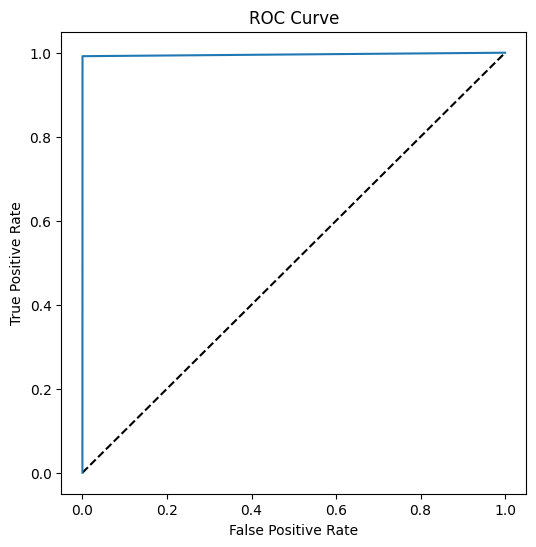

In [21]:
fpr, tpr, thresholds = metric.roc_curve(y_test, y_knn_pred)

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2).fit(X_train, y_train)
y_withoutMinMax_knn_pred = knn.predict(X_test)
accuracy_score(y_test, y_withoutMinMax_knn_pred)
confusion_matrix(y_test, y_withoutMinMax_knn_pred)

array([[180532,   1987],
       [  1273,  16208]], dtype=int64)

Масштабирование творит чудеса.....

Попробуем сделать грязюку с балансом классов:

In [23]:
nm = NearMiss()
X_nm_train, y_nm_train = nm.fit_resample(X_train, y_train)

Input = [('minmaxscaler', MinMaxScaler()), ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)) ]

pipe = Pipeline(Input)
pipe.fit(X_nm_train, y_nm_train)

y_nm_knn_pred = pipe.predict(X_test)

accuracy_score(y_test, y_nm_knn_pred)
confusion_matrix(y_test, y_nm_knn_pred)

array([[177669,   4850],
       [    41,  17440]], dtype=int64)

Text(0, 0.5, 'Количество карт')

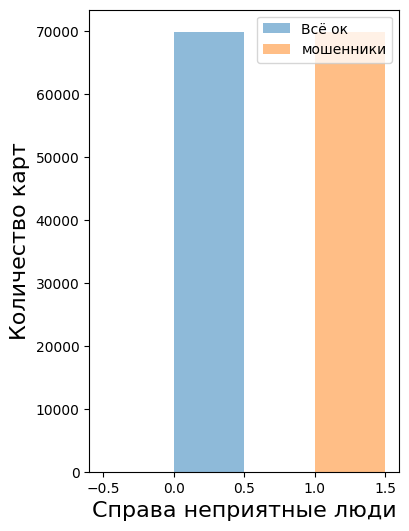

In [24]:
bins = 2

plt.figure(figsize = (4,6))

plt.hist(y_nm_train.loc[y_nm_train == 0], bins, alpha = 0.5, label = 'Всё ок')

plt.hist(y_nm_train.loc[y_nm_train == 1], bins, alpha = 0.5, label = 'мошенники')
plt.legend()

plt.xlabel('Справа неприятные люди', fontsize = 16)
plt.ylabel('Количество карт', fontsize = 16)

Ну чтож, не всегда баланс классов - благо.

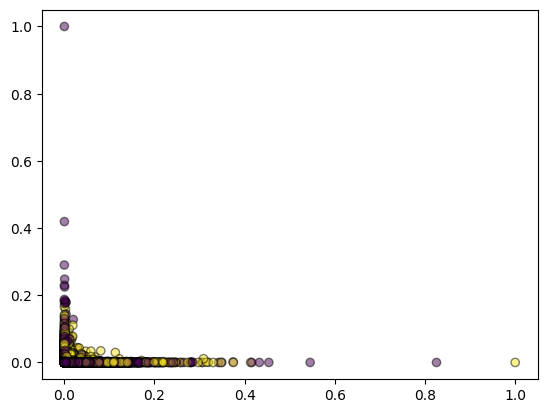

In [25]:
mn =  MinMaxScaler()
mn.fit(df.drop(['fraud'],axis=1))
X=np.array(mn.transform(df.drop(['fraud'],axis=1)))

y=np.array(df['fraud'])

plt.scatter(X[:, 0], X[:, 1],alpha=0.5, marker="o", c=y, edgecolor="k")

Для более приятного распределения удалим выбросы

In [26]:

outlier=df[['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
df_filtered = outlier[~((outlier < (Q1 - 3 * IQR)) |(outlier > (Q3 + 3 * IQR))).any(axis=1)]

In [27]:
df_filtered=df_filtered.merge(df, how='inner')
df_filtered

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
834640,2.207101,0.112651,1.626798,1,1,0,0,0
834641,19.872726,2.683904,2.778303,1,1,0,0,0
834642,2.914857,1.472687,0.218075,1,1,0,1,0
834643,4.258729,0.242023,0.475822,1,0,0,1,0


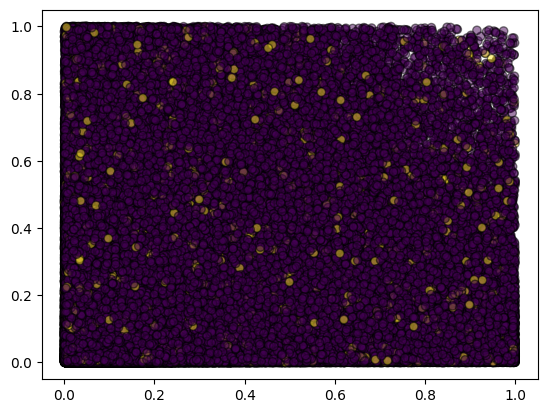

In [28]:
mn =  MinMaxScaler()
mn.fit(df_filtered.drop(['fraud'],axis=1))
X=np.array(mn.transform(df_filtered.drop(['fraud'],axis=1)))

y=np.array(df_filtered['fraud'])

plt.scatter(X[:, 0], X[:, 1],alpha=0.5, marker="o", c=y, edgecolor="k")

Раз уж пошло на то дело, то давайте попробуем сделать модель на основе отфильтрованных данных

In [29]:
X = df_filtered.drop(['fraud'], axis = 1)
y = df_filtered['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [30]:
Input = [('minmaxscaler', MinMaxScaler()), ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)) ]

pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

y_filtered_pred=pipe.predict(X_test)

print(classification_report(y_test, y_filtered_pred))
metric.roc_auc_score(y_test, y_filtered_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160100
           1       0.99      0.99      0.99      6829

    accuracy                           1.00    166929
   macro avg       1.00      1.00      1.00    166929
weighted avg       1.00      1.00      1.00    166929



0.995157949220674

In [31]:
accuracy_score(y_test, y_filtered_pred)
confusion_matrix(y_test, y_filtered_pred)

array([[160050,     50],
       [    64,   6765]], dtype=int64)

Посмотрим на результат относительно данных с выбросами:

In [32]:
Input = [('minmaxscaler', MinMaxScaler()), ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)) ]

pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

X = df.drop(['fraud'], axis = 1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

y_filtered_pred=pipe.predict(X_test)

print(classification_report(y_test, y_filtered_pred))
metric.roc_auc_score(y_test, y_filtered_pred)
accuracy_score(y_test, y_filtered_pred)
confusion_matrix(y_test, y_filtered_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    182519
           1       1.00      0.70      0.82     17481

    accuracy                           0.97    200000
   macro avg       0.98      0.85      0.91    200000
weighted avg       0.97      0.97      0.97    200000



array([[182473,     46],
       [  5195,  12286]], dtype=int64)

Модель, обученная на данных с выбросами справляется значительно лучше.

### Наивный байес:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

Input = [('minmaxscaler', MinMaxScaler()), ('model', GaussianNB()) ]

pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

metric.roc_auc_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)


array([[179716,   2803],
       [  6706,  10775]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    182519
           1       0.79      0.62      0.69     17481

    accuracy                           0.95    200000
   macro avg       0.88      0.80      0.83    200000
weighted avg       0.95      0.95      0.95    200000



In [35]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

metric.roc_auc_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[179716,   2803],
       [  6708,  10773]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    182519
           1       0.79      0.62      0.69     17481

    accuracy                           0.95    200000
   macro avg       0.88      0.80      0.83    200000
weighted avg       0.95      0.95      0.95    200000



Масштабирование почти не повлияло на результат.

### Логистическая регрессия:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    182519
           1       0.90      0.61      0.73     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
confusion_matrix(y_test, y_pred)

array([[181267,   1252],
       [  6798,  10683]], dtype=int64)

А с нормализацией?????

In [39]:
Input = [('minmaxscaler', MinMaxScaler()), ('model', GaussianNB()) ]

pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

metric.roc_auc_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)


array([[179842,   2677],
       [  7034,  10447]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    182519
           1       0.80      0.60      0.68     17481

    accuracy                           0.95    200000
   macro avg       0.88      0.79      0.83    200000
weighted avg       0.95      0.95      0.95    200000



С нормализацией получился cringe...

### SVM

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

clf = svm.LinearSVC(C=10,max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.99      0.97    182519
           1       0.85      0.52      0.65     17481

    accuracy                           0.95    200000
   macro avg       0.90      0.76      0.81    200000
weighted avg       0.95      0.95      0.95    200000



C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
metric.roc_auc_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[180939,   1580],
       [  8305,   9176]], dtype=int64)

## Классификаторы

In [41]:
classifiers = {
    'Linear SVC': svm.LinearSVC(C=10,max_iter=10000),
    'KNN classifier': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Naive Bayes': GaussianNB(),
    'Log reg': LogisticRegression(random_state=0),
}

n_classifiers = len(classifiers)
import pickle

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))
    with open("KNN.pickle", "wb") as f:
        pickle.dump(classifier, f)
    break

Accuracy (train) for Linear SVC: 95.7% 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.89      0.57      0.70        87

    accuracy                           0.96      1000
   macro avg       0.93      0.78      0.84      1000
weighted avg       0.95      0.96      0.95      1000



C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
